In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("dataset.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

# Preprocessing the features

In [4]:
## Handling missing values

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# Model Training

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X, y = df.iloc[:,:-1], df.iloc[:,-1]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123, test_size = 0.3)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((212, 13), (91, 13), (212,), (91,))

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score 

In [12]:
rf = RandomForestClassifier(max_depth = 10)

In [33]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [34]:
print(f"Accuracy Score : {accuracy_score(y_test,y_pred)} \
Recall : {recall_score(y_test,y_pred)} \
Precision : {precision_score(y_test,y_pred)} \
F1_Score : {f1_score(y_test,y_pred)}")

Accuracy Score : 0.8131868131868132 Recall : 0.8695652173913043 Precision : 0.7843137254901961 F1_Score : 0.8247422680412372


# Hyperparameter Tuning

In [15]:
from sklearn.model_selection import RandomizedSearchCV

In [16]:
params = {"n_estimators" : [100,200,300,500],
         "criterion" : ["gini", "entropy", "log_loss"],
         "max_depth" : list(range(10)),
         "min_samples_split" : list(range(9)),
         "min_samples_leaf" : list(range(5)),
         "max_features" : ["sqrt", "log2", None],
         "oob_score" : [True]}

In [38]:
model = RandomizedSearchCV(RandomForestClassifier(), param_distributions=params, cv = 5, n_iter = 150, scoring = "accuracy")

In [39]:
model.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
295 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 341, in fit
    self._validate_params()
  File "/opt/conda/lib/python3.10/site-packages/sklearn/base.py", line 570, in _validate_params
    validate_parameter_constraints(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/uti

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=150,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [0, 1, 2, 3, 4],
                                        'min_samples_split': [0, 1, 2, 3, 4, 5,
                                                              6, 7, 8],
                                        'n_estimators': [100, 200, 300, 500],
                                        'oob_score': [True]},
                   scoring='accuracy')

In [40]:
model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=3,
                       min_samples_split=5, oob_score=True)

In [41]:
model.best_params_, model.best_score_

({'oob_score': True,
  'n_estimators': 100,
  'min_samples_split': 5,
  'min_samples_leaf': 3,
  'max_features': 'sqrt',
  'max_depth': 8,
  'criterion': 'entropy'},
 0.8588039867109636)

In [42]:
best_model = model.best_estimator_

In [43]:
best_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=3,
                       min_samples_split=5, oob_score=True)

In [44]:
pred = best_model.predict(X_test)

### Tuned Model

In [45]:
print(f"Accuracy Score : {accuracy_score(y_test,pred)} \
Recall : {recall_score(y_test,pred)} \
Precision : {precision_score(y_test,pred)} \
F1_Score : {f1_score(y_test,pred)}")

Accuracy Score : 0.8131868131868132 Recall : 0.8913043478260869 Precision : 0.7735849056603774 F1_Score : 0.8282828282828283


### Default Model

In [46]:
print(f"Accuracy Score : {accuracy_score(y_test,y_pred)} \
Recall : {recall_score(y_test,y_pred)} \
Precision : {precision_score(y_test,y_pred)} \
F1_Score : {f1_score(y_test,y_pred)}")

Accuracy Score : 0.8131868131868132 Recall : 0.8695652173913043 Precision : 0.7843137254901961 F1_Score : 0.8247422680412372


In [55]:
list_importances = []
for names, values in zip(best_model.feature_names_in_, best_model.feature_importances_):
    list_importances.append((names,values))

In [56]:
list_importances

[('age', 0.09707786309411366),
 ('sex', 0.04219497530715608),
 ('cp', 0.13633674280363026),
 ('trestbps', 0.0531351618411506),
 ('chol', 0.06371379277869689),
 ('fbs', 0.006997286311594153),
 ('restecg', 0.01650522915667421),
 ('thalach', 0.13077974528455402),
 ('exang', 0.04011567479560263),
 ('oldpeak', 0.1057308060775212),
 ('slope', 0.03360872757836769),
 ('ca', 0.15457151791574725),
 ('thal', 0.11923247705519138)]

In [58]:
sorted_data = sorted(list_importances, key=lambda x: x[1])

In [102]:
x, y = [names[0] for names in sorted_data[:2]]
x, y

('fbs', 'restecg')

In [103]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


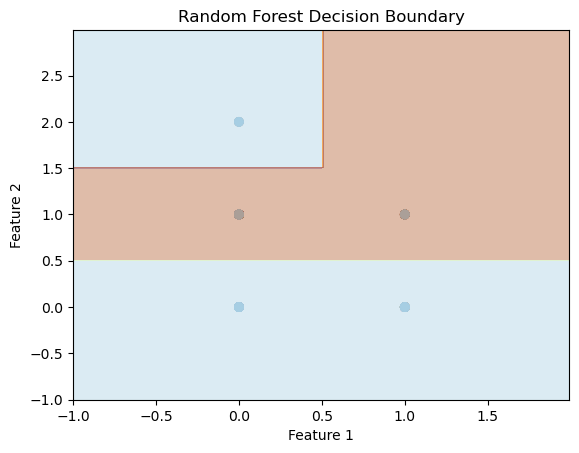

In [109]:
X = df[['fbs', 'restecg']]
y = df.iloc[:,-1]

# Train a Random Forest classifier
best_model.fit(X, y)

# Create a mesh grid
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Make predictions on the mesh grid
Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a scatter plot of the data
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Paired)

# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Paired)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Random Forest Decision Boundary')
plt.show()